# Task continuation

### 8 & 9. Comparison of Customer Profiles with regions and Departments including Charts
##### Customer profiles include: age group, income group/bracket and number of dependents


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 4\23-11-2024 Instacart Basket Analysis'

In [3]:
# Importing last main Dataframe i was working on..
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_task4_10_1.pkl'))

#### Creating a subset that actually represents the  dataframe - A Sample

In [4]:
# Setting the seed
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [5]:
# checking dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [6]:
# Storing 70% of the sample in the dataframe 'big'
big = df[dev]

In [7]:
# Storing 30% of the sample in the dataframe 'small'
small = df[~dev]

In [8]:
# Checking results
len(df)

32404859

In [9]:
# Checking small dataframe results
len(small)

9721098

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
# Checking small dataframe with columns
small.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group,dependents_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,both,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents
10,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,both,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents


In [12]:
# Importing department dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [13]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
# Renaming 'Unnamed: 0' column
df_dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [15]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
# Merging dataframes small and df_dept
smalldf_dept_merge = small.merge(df_dept, on = 'department_id', how = 'left', indicator = True)

In [17]:
smalldf_dept_merge.head()

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group,dependents_flag,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents,beverages,both
1,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents,snacks,both
2,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents,snacks,both
3,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,both,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents,snacks,both
4,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,both,Slowest days,Average orders,10,New customer,6.367797,Low_spender,20.5,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Adult,Low income,Dependents,breakfast,both


In [18]:
smalldf_dept_merge['department'].value_counts(dropna = False)

department
produce            2843763
dairy eggs         1619377
snacks              865530
beverages           804974
frozen              671295
pantry              562613
bakery              352078
canned goods        320281
deli                315131
dry goods pasta     259926
household           221881
meat seafood        212771
breakfast           211231
personal care       134390
babies              127257
international        81300
alcohol              45826
pets                 29355
missing              20714
other                10922
bulk                 10483
Name: count, dtype: int64

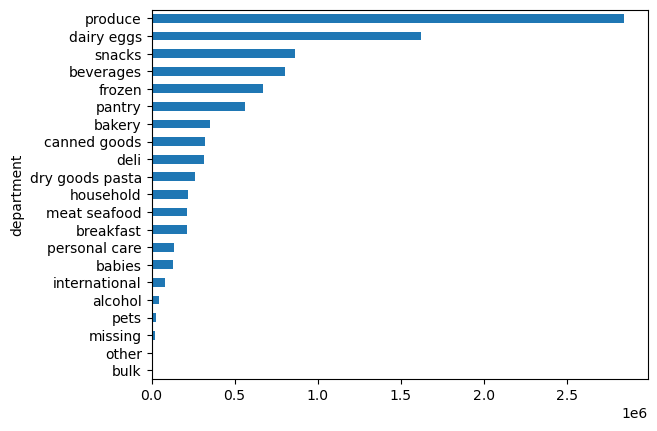

In [19]:
# Creating departments' bar chart (Horizontal)
df_dept_bar = smalldf_dept_merge['department'].value_counts().sort_values(ascending=True).plot.barh()

In [20]:
# Exporting departments bar chart
df_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_prods_bar.png'))

#### 8.1 Customer profile by regions
##### Comparing age_group by region

In [21]:
age_group_region = pd.crosstab(smalldf_dept_merge['region'], smalldf_dept_merge['age_group'], dropna = False)

In [22]:
age_group_region

age_group,Adult,Older Adult,Senior,Young,Young Adult
region,,,,,
Midwest,723578,532991,564590,106700,351400
Northeast,534733,397797,437500,79491,269158
South,1017235,751224,801141,154822,513488
West,775727,584262,621952,115056,388253


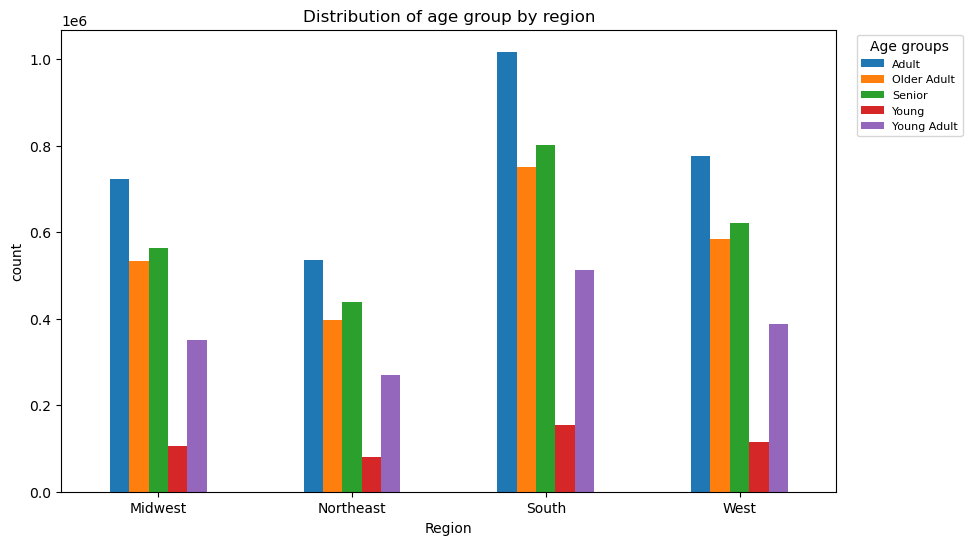

In [23]:
# Creating bar Chart comparing age group by region
age_group_comparison = age_group_region.plot(kind = 'bar', figsize=(10, 6))
plt.title('Distribution of age group by region')
plt.xlabel('Region')
plt.ylabel('count')
# Moving legend out of plot area
plt.legend(title='Age groups', bbox_to_anchor=(1.17, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.xticks(rotation=0) # Set labels horizontal
plt.show()

In [25]:
# Exporting bar chart
age_group_comparison.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_comp_bar.png'))

#### 8.1b Comparing income_groups by region

In [24]:
income_region_comparison = pd.crosstab(smalldf_dept_merge['region'], smalldf_dept_merge['income_group'], dropna = False)

In [25]:
income_region_comparison

income_group,High income,Low income,Middle income
region,,,
Midwest,19669,1217024,1042566
Northeast,12513,930238,775928
South,25492,1778022,1434396
West,20076,1353378,1111796


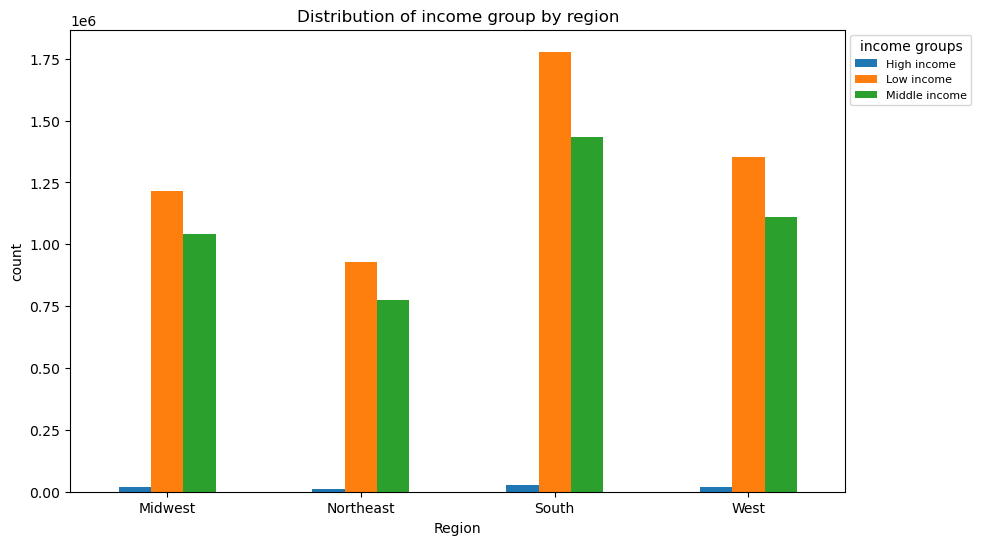

In [26]:
# Creating bar Chart comparing income group by region
income_region = income_region_comparison.plot(kind = 'bar', figsize=(10, 6))
plt.title('Distribution of income group by region')
plt.xlabel('Region')
plt.ylabel('count')
# Moving legend out of plot area
plt.legend(title='income groups', bbox_to_anchor=(1.17, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.xticks(rotation=0) # set labels horizontal
plt.show()

In [29]:
# Exporting bar chart
income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_comp_bar.png'))

#### 8.1c Comparison of Dependents and region

In [27]:
dependents_region_comp = pd.crosstab(smalldf_dept_merge['region'], smalldf_dept_merge['dependents_flag'], dropna = False)

In [28]:
dependents_region_comp

dependents_flag,Dependents,No dependents
region,,
Midwest,1707438,571821
Northeast,1293052,425627
South,2427910,810000
West,1864439,620811


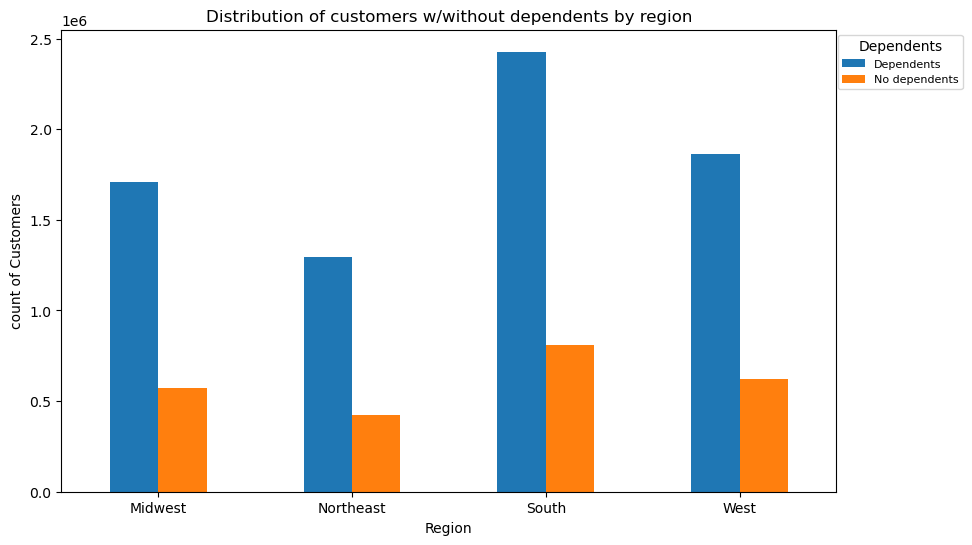

In [32]:
# Creating bar Chart comparing number of dependents group by region
dependents_region = dependents_region_comp.plot(kind = 'bar', figsize=(10, 6))
plt.title('Distribution of customers w/without dependents by region')
plt.xlabel('Region')
plt.ylabel('count of Customers')
# Moving legend out of plot area
plt.legend(title='Dependents', bbox_to_anchor=(1.17, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.xticks(rotation=0) # set labels horizontal
plt.show()

In [33]:
# Exporting bar chart
dependents_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_regions_comp_bar.png'))

#### 8.1d Comparison of Departments by regions

In [29]:
dept_region_comparison = pd.crosstab(smalldf_dept_merge['department'], smalldf_dept_merge['region'], dropna = False)

In [30]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,10793,7865,15297,11871
babies,30050,22595,42917,31695
bakery,82551,62466,116794,90267
beverages,187236,145058,269335,203345
breakfast,49048,36952,70559,54672
bulk,2465,1732,3536,2750
canned goods,75225,56242,106467,82347
dairy eggs,379378,286480,538994,414525
deli,73728,55683,104902,80818


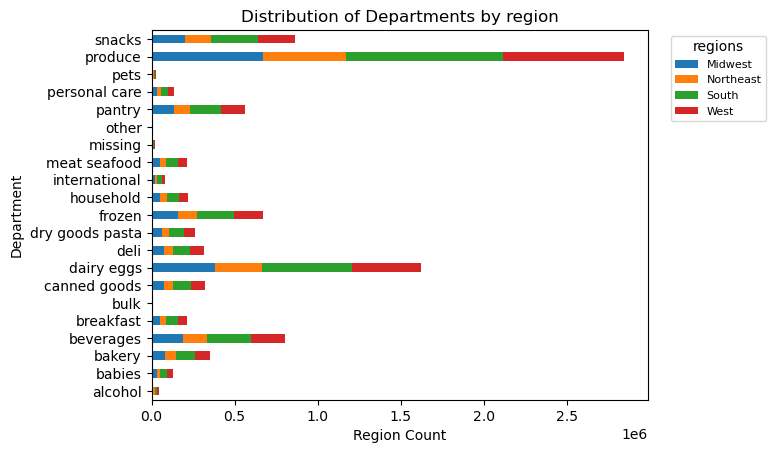

In [31]:
# Creating region and department bar Chart
department_region = dept_region_comparison.plot.barh(stacked = True)
plt.title('Distribution of Departments by region')
plt.xlabel('Region Count')
plt.ylabel('Department')
# Moving legend out of plot area
plt.legend(title='regions', bbox_to_anchor=(1.25, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.show()

In [37]:
# Exporting bar chart
department_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_region_comp_bar.png'))

#### 8.2 comparison of customer age groups with departments

In [32]:
age_dept_comparison = pd.crosstab(smalldf_dept_merge['department'], smalldf_dept_merge['age_group'], dropna = False)

In [33]:
age_dept_comparison

age_group,Adult,Older Adult,Senior,Young,Young Adult
department,,,,,
alcohol,14707,10584,10986,2641,6908
babies,40592,29398,31057,6146,20064
bakery,110621,82436,87381,16201,55439
beverages,251118,189420,202060,36734,125642
breakfast,66510,49439,52102,9985,33195
bulk,3334,2339,2634,492,1684
canned goods,100030,74873,79616,15019,50743
dairy eggs,511155,373795,403545,76121,254761
deli,99397,73621,78265,14576,49272


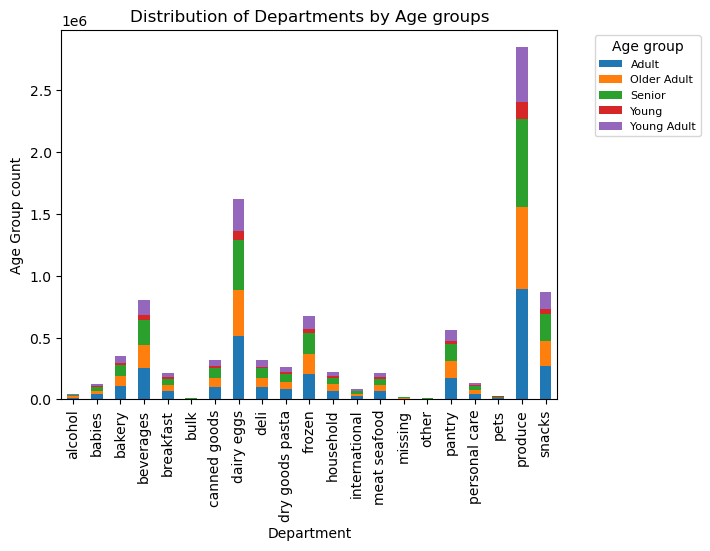

In [34]:
# Creating age group with department comparison bar chart
age_dept_comp = age_dept_comparison.plot.bar(stacked = True)
plt.title('Distribution of Departments by Age groups')
plt.xlabel('Department')
plt.ylabel('Age Group count')
# Moving legend out of plot area
plt.legend(title='Age group', bbox_to_anchor=(1.3, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.show()

In [41]:
# Exporting comparison of departments by age groups bar chart
age_dept_comp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_comp_bar.png'))

#### 8.2b Comparison of Customer income groups with Departments

In [35]:
income_dept_comp = pd.crosstab(smalldf_dept_merge['department'], smalldf_dept_merge['income_group'], dropna = False)

In [36]:
income_dept_comp

income_group,High income,Low income,Middle income
department,,,
alcohol,1863,24066,19897
babies,664,66458,60135
bakery,3819,186819,161440
beverages,7495,454344,343135
breakfast,1986,117987,91258
bulk,6,6019,4458
canned goods,2792,167633,149856
dairy eggs,13516,869697,736164
deli,2224,170830,142077


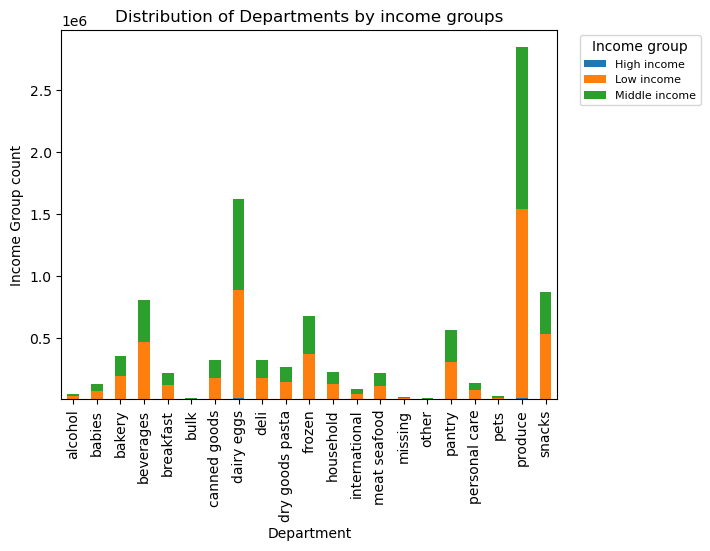

In [37]:
# Creating comparison of income groups with departments bar chart
income_dept_comparison = income_dept_comp.plot.bar(stacked = True)
plt.title('Distribution of Departments by income groups')
plt.xlabel('Department')
plt.ylabel('Income Group count')
# Moving legend out of plot area
plt.legend(title='Income group', bbox_to_anchor=(1.3, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.show()

In [45]:
# Exporting comparison of income with departments bar chart
income_dept_comparison.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_comp_bar.png'))

In [38]:
# Grouping income_group and Departments counts and creating a count column
income_dept_counts = smalldf_dept_merge.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [39]:
income_dept_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
income_dept_counts.head(100)

,income_group,department,counts
61,Middle income,produce,1307438
49,Middle income,dairy eggs,736164
45,Middle income,beverages,343135
62,Middle income,snacks,337106
52,Middle income,frozen,305392
58,Middle income,pantry,259494
44,Middle income,bakery,161440
48,Middle income,canned goods,149856
50,Middle income,deli,142077
51,Middle income,dry goods pasta,121441


#### 8.2c Comparison of Customers w/without dependents with Departments

In [42]:
dependents_dept_comp = pd.crosstab(smalldf_dept_merge['department'], smalldf_dept_merge['dependents_flag'], dropna = False)

In [43]:
dependents_dept_comp

dependents_flag,Dependents,No dependents
department,,
alcohol,34169,11657
babies,95228,32029
bakery,263902,88176
beverages,603226,201748
breakfast,158816,52415
bulk,8035,2448
canned goods,240708,79573
dairy eggs,1214968,404409
deli,235664,79467


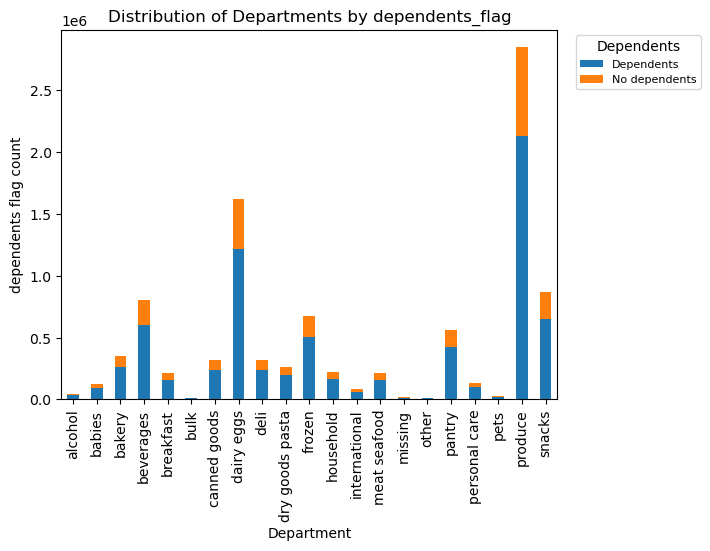

In [44]:
# Creating comparison of dependents flag with departments bar chart
dependents_dept_comparison = dependents_dept_comp.plot.bar(stacked = True)
plt.title('Distribution of Departments by dependents_flag')
plt.xlabel('Department')
plt.ylabel('dependents flag count')
# Moving legend out of plot area
plt.legend(title='Dependents', bbox_to_anchor=(1.3, 1), loc='upper right', fontsize=8, title_fontsize=10)
plt.show()

In [53]:
# Exporting comparison of department by dependents flag bar chart
dependents_dept_comparison.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depend_dept_comp_bar.png'))

#### Ordering habits base on customer profile loyalty status
#### Loyalty by income group

In [51]:
# crosstab loyalty with income group
loyalty_income_crosstab = pd.crosstab(smalldf_dept_merge['loyalty_flag'], smalldf_dept_merge['income_group'], dropna = False)

In [46]:
loyalty_income_crosstab

income_group,High income,Low income,Middle income
loyalty_flag,,,
New customer,7747,1047762,816651
Regular customer,40210,2572389,2150558
loyal customer,29793,1658511,1397477


(array([0, 1, 2]),
 [Text(0, 0, 'New customer'),
  Text(1, 0, 'Regular customer'),
  Text(2, 0, 'loyal customer')])

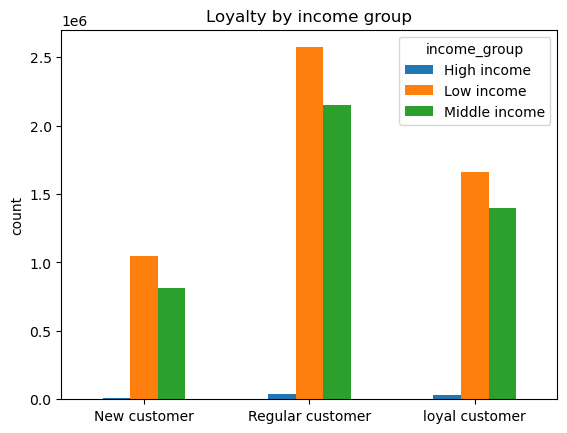

In [69]:
# Creating Bar chart
loyalty_income_bar = loyalty_income_crosstab.plot.bar()
plt.title('Loyalty by income group')
plt.xlabel('')
plt.ylabel ('count')
plt.xticks(rotation=0)

In [50]:
# Exporting bar chart
loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_income_group_bar.png'))

#### Loyalty by age group

In [52]:
# crosstab loyalty by age group
loyalty_age_crosstab = pd.crosstab(smalldf_dept_merge['loyalty_flag'], smalldf_dept_merge['age_group'], dropna = False)
loyalty_age_crosstab

age_group,Adult,Older Adult,Senior,Young,Young Adult
loyalty_flag,,,,,
New customer,580712,441181,467568,88081,294618
Regular customer,1493877,1106560,1184728,228205,749787
loyal customer,976684,718533,772887,139783,477894


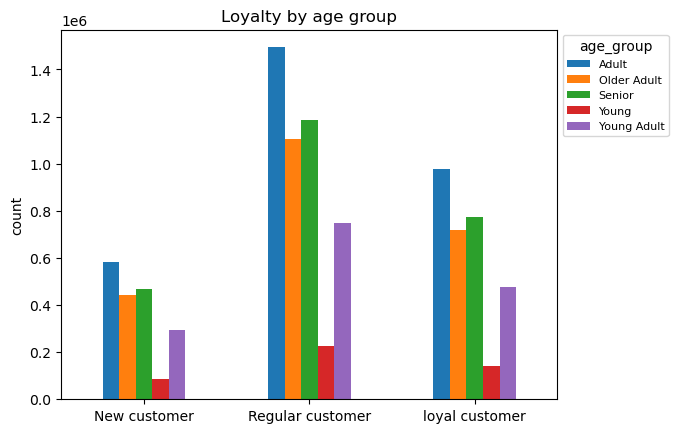

In [55]:
# Creating bar chart
loyalty_age_bar = loyalty_age_crosstab.plot.bar()
plt.title('Loyalty by age group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='age_group', bbox_to_anchor=(1, 1), loc='upper left', fontsize=8, title_fontsize=10)
plt.show()

In [57]:
# Exporting bar chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loayalty_age_group_bar.png'))

#### Loyalty by family status

In [58]:
# crosstab loyalty by family status
loyalty_fam_status_crosstab = pd.crosstab(smalldf_dept_merge['loyalty_flag'], smalldf_dept_merge['family_status'], dropna = False)
loyalty_fam_status_crosstab

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
New customer,158972,87214,1317374,308600
Regular customer,407420,230199,3349083,776455
loyal customer,264850,147547,2161422,511962


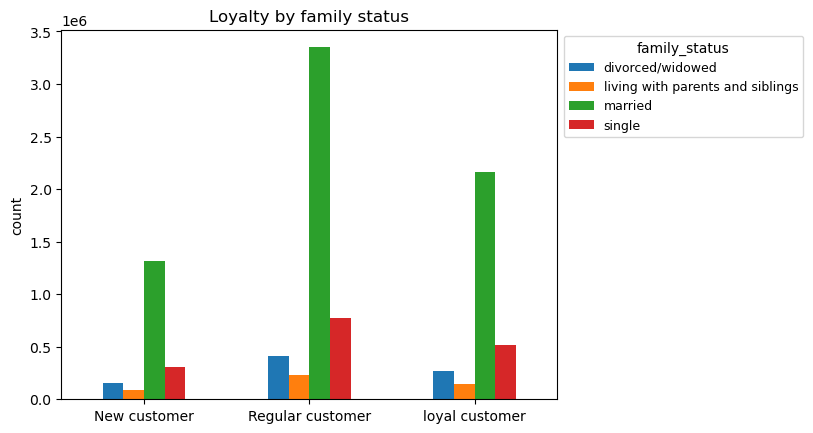

In [60]:
# Creating bar Chart
loyalty_fam_status_bar = loyalty_fam_status_crosstab.plot.bar()
plt.title('Loyalty by family status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='family_status', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.show()

In [61]:
# Exporting bar chart
loyalty_fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_fam_status_bar.png'))

#### Distribution of family status

In [63]:
# Checking family status values
fam_status = smalldf_dept_merge['family_status'].value_counts(dropna = False)
fam_status

family_status
married                             6827879
single                              1597017
divorced/widowed                     831242
living with parents and siblings     464960
Name: count, dtype: int64

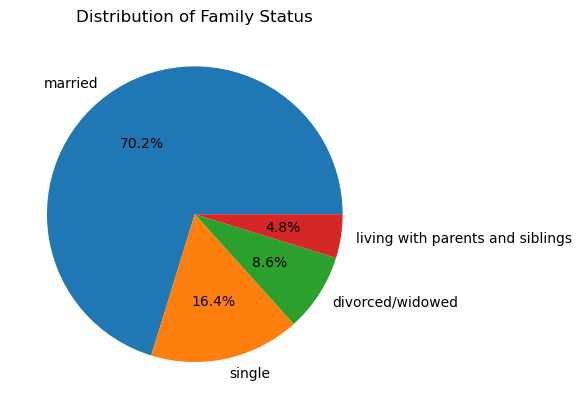

In [67]:
# Creatin pie chart for distribution of family status
fam_status_dist_pie = fam_status.plot.pie(autopct = '%1.1f%%', labels = ['married', 'single', 'divorced/widowed', 'living with parents and siblings'])
plt.ylabel('')
plt.title('Distribution of Family Status')
plt.show()

In [68]:
# Exporting pie chart
fam_status_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_bar.png'))

#### Loyalty by dependents status

In [70]:
loyalty_depend_crosstab = pd.crosstab(smalldf_dept_merge['loyalty_flag'], smalldf_dept_merge['dependents_flag'], dropna = False)
loyalty_depend_crosstab

dependents_flag,Dependents,No dependents
loyalty_flag,,
New customer,1404588,467572
Regular customer,3579282,1183875
loyal customer,2308969,776812


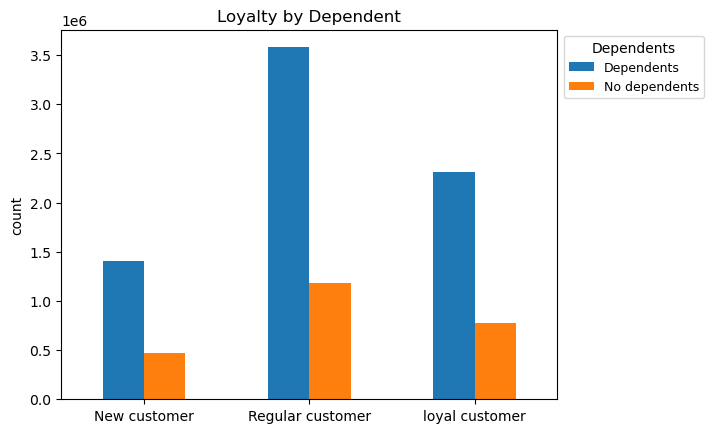

In [72]:
# Creating bar Chart
loyalty_depend_bar = loyalty_depend_crosstab.plot.bar()
plt.title('Loyalty by Dependent')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Dependents', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.show()

In [73]:
# Exporting chart
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_depend_bar.png'))

### 10. Preparation to export final data set and save notebook

In [54]:
# Dropping unneccessary column in the dataframe
smalldf_dept_merge.drop('_merge', axis = 1, inplace = True)

In [55]:
#Checking dataframe for dropped column
smalldf_dept_merge.head(0)

,order_id,user_id,number_of_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group,dependents_flag,department


In [158]:
# Exporting final dataset
smalldf_dept_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset_4.10.pkl'))